## 加载数据

In [ ]:
import numpy as np
from svm import SVC
import sklearn
from matplotlib.colors import ListedColormap

def loadDataSet(fileName):
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return np.array(dataMat), np.array(labelMat)

data, label = loadDataSet('./testSet.txt')


## 线性可分二分类

L==H
全部遍历, iter:0 i:0, pairs changed 0
全部遍历, iter:0 i:1, pairs changed 1
全部遍历, iter:0 i:2, pairs changed 2
j not moving enough
全部遍历, iter:0 i:3, pairs changed 2
全部遍历, iter:0 i:4, pairs changed 3
全部遍历, iter:0 i:5, pairs changed 4
全部遍历, iter:0 i:6, pairs changed 4
j not moving enough
全部遍历, iter:0 i:7, pairs changed 4
全部遍历, iter:0 i:8, pairs changed 5
全部遍历, iter:0 i:9, pairs changed 5
全部遍历, iter:0 i:10, pairs changed 6
全部遍历, iter:0 i:11, pairs changed 6
全部遍历, iter:0 i:12, pairs changed 6
L==H
全部遍历, iter:0 i:13, pairs changed 6
全部遍历, iter:0 i:14, pairs changed 6
全部遍历, iter:0 i:15, pairs changed 6
全部遍历, iter:0 i:16, pairs changed 6
全部遍历, iter:0 i:17, pairs changed 7
全部遍历, iter:0 i:18, pairs changed 7
全部遍历, iter:0 i:19, pairs changed 7
全部遍历, iter:0 i:20, pairs changed 7
全部遍历, iter:0 i:21, pairs changed 7
全部遍历, iter:0 i:22, pairs changed 7
j not moving enough
全部遍历, iter:0 i:23, pairs changed 7
全部遍历, iter:0 i:24, pairs changed 7
L==H
全部遍历, iter:0 i:25, pairs changed 7
L==H
全部遍历, iter:0 i:26, p

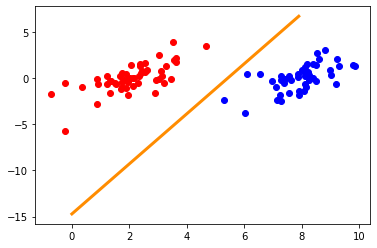

In [19]:
data, label = loadDataSet('./testSet.txt')

svm = SVC(kernel='linear', probability=True, verbose=True)
result = svm.fit(data, label.reshape((-1, 1)))
print("alpha:")
print(result.alpha_)
print("w:")
print(result.w_)
print("b:")
print(result.b_)
print("support_vectors:")
print(result.support_vectors_)
svm.predict(np.array([[5, 2]]))
print("prob:")
print(result.predict_prob_)

import matplotlib.pyplot as plt

support_xlim = []
support_ylim = []
for i in range(100):
    if result.alpha_[i] > 0.0:
        support_xlim.append(data[i, 0])
        support_ylim.append(data[i, 1])
plt.scatter(data[label == 1][:, 0], data[label == 1][:, 1], color='b')
plt.scatter(data[label == -1][:, 0], data[label == -1][:, 1], color='r')
# plt.scatter(support_xlim, support_ylim, color='g')

x = np.arange(-0.0, 8.0, 0.1)
y = (-result.b_ - result.w_[0] * x) / result.w_[1]  # 由w1*x1+w2*x2+b=0得到x2(即y)=(-b-w1x1)/w2
x.shape = (len(x), 1)
y.shape = (len(x), 1)
plt.plot(x, y, color="darkorange", linewidth=3.0, label="Boarder")  # 继续在ax图上作图

plt.show()

## 线性不可分二分类

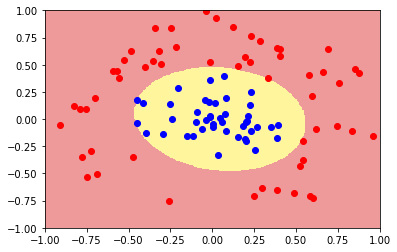

In [20]:
data, label = loadDataSet('./testSetRBF.txt')

# 绘制决策边界
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new).reshape(x0.shape)
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D'])
    plt.contourf(x0, x1, y_predict, cmap=custom_cmap)

svm = SVC(C=1e9, kernel='rbf', gamma='scale')
result = svm.fit(data, label.reshape((-1, 1)))

support_vectors = svm.support_vectors_
support_xlim = []
support_ylim = []
for i in range(len(support_vectors)):
    support_xlim.append(support_vectors[i, 0])
    support_ylim.append(support_vectors[i, 1])

plot_decision_boundary(svm, axis=[-1, 1, -1, 1])
plt.scatter(data[label == 1][:, 0], data[label == 1][:, 1], color='b')
plt.scatter(data[label == -1][:, 0], data[label == -1][:, 1], color='r')
plt.show()

## 对比sklearn.svm.SVC

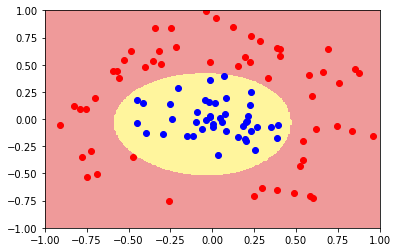

In [21]:
svm = sklearn.svm.SVC(C=1, kernel='rbf', gamma='scale')
result = svm.fit(data, label)

support_vectors = svm.support_vectors_
support_xlim = []
support_ylim = []
for i in range(len(support_vectors)):
    support_xlim.append(support_vectors[i, 0])
    support_ylim.append(support_vectors[i, 1])

plot_decision_boundary(svm, axis=[-1, 1, -1, 1])
plt.scatter(data[label == 1][:, 0], data[label == 1][:, 1], color='b')
plt.scatter(data[label == -1][:, 0], data[label == -1][:, 1], color='r')
plt.show()
